# BELTRANS translation statistics

This notebook displays statistics about the book translations in the BELTRANS corpus. It aims to measure the improvement performed by different data integration or enrichment techniques.


In [1]:
import pandas as pd
import sys, os

sys.path.insert(1, os.pardir)
import utils
import utils_stats
import utils_plot

* 1.1 Existing measurements
* 1.2 Identifiers
* 1.3 ISBN identifiers
* 1.4 Contributor information
* 1.5 Information about original of translation (source)
* 1.6 All statistics for the 'other' corpus

## Existing measurements

The measured statistics currently evolve like this:



In [2]:
translationMeasurementFiles = [
    '2022-05-03_translation-stats.csv', '2022-05-09_translation-stats.csv', 
    '2022-05-23_translation-stats.csv', '2022-06-07_translation-stats.csv',
    '2022-06-16_translation-stats.csv', '2022-06-20_translation-stats.csv',
    '2022-06-23_translation-stats.csv', '2022-06-24_translation-stats.csv',
    '2022-07-18_translation-stats.csv', '2022-07-20_translation-stats.csv',
    '2022-07-21_translation-stats.csv', '2022-07-25_translation-stats.csv',
    '2022-07-26_translation-stats.csv', '2022-07-27_translation-stats.csv',
    '2022-08-08_translation-stats.csv', '2022-08-11_translation-stats.csv',
    '2022-08-18_translation-stats.csv', '2022-09-05_translation-stats.csv',
    '2022-09-07_translation-stats.csv', '2022-09-08_translation-stats.csv',
    '2022-09-12_translation-stats.csv', '2022-09-27_translation-stats.csv',
    '2022-11-30_translation-stats.csv', '2022-12-09_translation-stats.csv',
    '2022-12-15_translation-stats.csv', '2022-12-21_translation-stats.csv',
    '2022-12-23_translation-stats.csv', '2023-01-20_translation-stats.csv',
    '2023-02-01_translation-stats.csv', '2023-02-02_translation-stats.csv',
    '2023-02-03_translation-stats.csv', '2023-05-05_translation-stats.csv',
    '2023-05-31_translation-stats.csv', '2023-06-30_translation-stats.csv',
    '2023-08-10_translation-stats.csv', '2023-10-09_translation-stats.csv'
]

In [3]:
translationStats = utils_stats.mergeMeasurementsToDataFrame('./measurements', translationMeasurementFiles)
statsFRNL = translationStats[translationStats['corpus'] == 'FR-NL'].copy()
statsNLFR = translationStats[translationStats['corpus'] == 'NL-FR'].copy()
statsOther = translationStats[translationStats['corpus'] == 'OTHER'].copy()

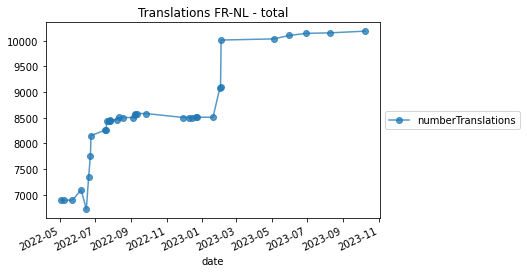

In [4]:
utils_plot.plotNumberTimeline(statsFRNL,
                                  ['numberTranslations'],
                                  'Translations FR-NL - total')

In [5]:
statsFRNL[['numberTranslations', 'comment']].sort_index()

,numberTranslations,comment
date,,
2022-05-03,6891,"Data integrated from KBR, BnF and KB based on ..."
2022-05-09,6891,"Data integrated from KBR, BnF and KB based on ..."
2022-05-23,6891,No changes to previous version.
2022-06-07,7091,Added publishing directors and included a coll...
2022-06-16,6715,Removed duplicate manifestations with the same...
2022-06-20,7350,New KBR data dump with plenty of additions and...
2022-06-23,7752,No ISBN duplicate removal anymore to prevent d...
2022-06-24,8149,"New KBR dump with old Dutch, old French and mi..."
2022-07-18,8254,Dataprofile query filtering also for Belgian o...


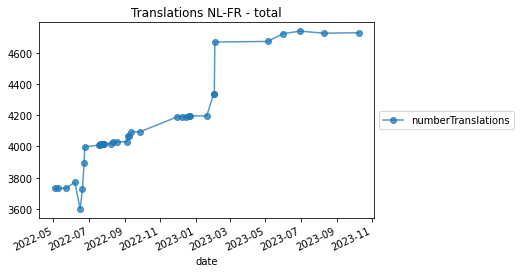

In [6]:
utils_plot.plotNumberTimeline(statsNLFR,
                                  ['numberTranslations'],
                                  'Translations NL-FR - total')

In [7]:
statsNLFR[['numberTranslations']].sort_index()

,numberTranslations
date,
2022-05-03,3731
2022-05-09,3731
2022-05-23,3731
2022-06-07,3772
2022-06-16,3597
2022-06-20,3724
2022-06-23,3897
2022-06-24,3997
2022-07-18,4009


## Identifiers
The total number of translations and how much have which third party identifier.

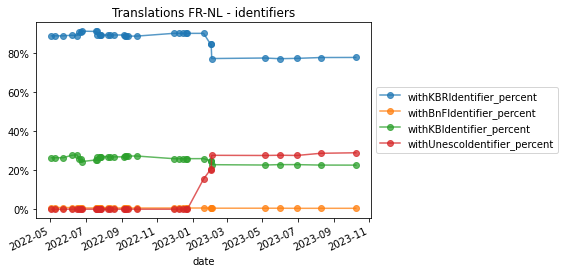

In [8]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 
                                   'withKBIdentifier', 'withUnescoIdentifier'],
                                  'Translations FR-NL - identifiers',
                                 'numberTranslations')

In [9]:
statsFRNL[['numberTranslations', 'withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier', 'withUnescoIdentifier']]

,numberTranslations,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withUnescoIdentifier
date,,,,,
2022-05-03,6891,6125,58,1817,0
2022-05-09,6891,6125,58,1817,0
2022-05-23,6891,6125,58,1817,0
2022-06-07,7091,6325,58,1961,0
2022-06-16,6715,5980,57,1873,0
2022-06-20,7350,6669,51,1890,0
2022-06-23,7752,7040,52,1983,0
2022-06-24,8149,7439,51,1990,0
2022-07-18,8254,7524,51,2082,0


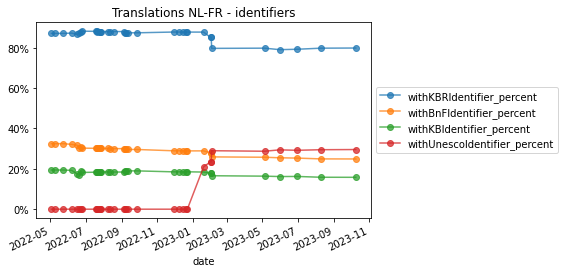

In [10]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 
                                   'withKBIdentifier', 'withUnescoIdentifier'],
                                  'Translations NL-FR - identifiers',
                                 'numberTranslations')

In [11]:
statsNLFR[['numberTranslations', 'withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier', 'withUnescoIdentifier']]

,numberTranslations,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withUnescoIdentifier
date,,,,,
2022-05-03,3731,3249,1211,724,0
2022-05-09,3731,3249,1211,724,0
2022-05-23,3731,3249,1211,724,0
2022-06-07,3772,3290,1211,725,0
2022-06-16,3597,3115,1141,631,0
2022-06-20,3724,3247,1136,632,0
2022-06-23,3897,3420,1207,728,0
2022-06-24,3997,3525,1209,727,0
2022-07-18,4009,3532,1209,735,0


In [12]:
overlapColumns = ['withKBRBnFKBAndUnescoIdentifier', 'withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier', 
           'withKBRAndKBIdentifier', 'withKBRAndUnescoIdentifier', 'withBnFAndKBIdentifier',
          'withBnFAndUnescoIdentifier', 'withKBAndUnescoIdentifier']

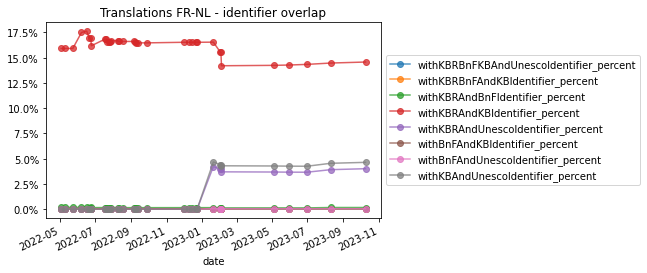

In [13]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  overlapColumns,
                                  'Translations FR-NL - identifier overlap',
                                 'numberTranslations')

In [14]:
statsFRNL[['numberTranslations'] + overlapColumns]

,numberTranslations,withKBRBnFKBAndUnescoIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,withKBRAndUnescoIdentifier,withBnFAndKBIdentifier,withBnFAndUnescoIdentifier,withKBAndUnescoIdentifier
date,,,,,,,,,
2022-05-03,6891,0,4,13,1096,0,4,0,0
2022-05-09,6891,0,4,13,1096,0,4,0,0
2022-05-23,6891,0,4,13,1096,0,4,0,0
2022-06-07,7091,0,4,13,1240,0,4,0,0
2022-06-16,6715,0,4,12,1183,0,4,0,0
2022-06-20,7350,0,4,12,1248,0,4,0,0
2022-06-23,7752,0,4,13,1310,0,4,0,0
2022-06-24,8149,0,4,13,1318,0,4,0,0
2022-07-18,8254,0,4,13,1390,0,4,0,0


Because of the outlier KBR&KB below a graph without that line

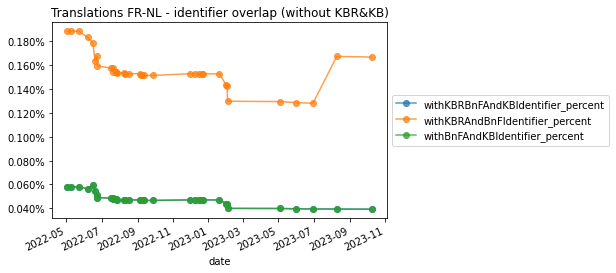

In [15]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations FR-NL - identifier overlap (without KBR&KB)',
                                 'numberTranslations')

In [16]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date                | comment                                                                                                                                                                   |
|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 00:00:00 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                                                              |
| 2022-05-09 00:00:00 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246.                                              |
| 2022-05-23 00:00:00 | No changes to previous version.                                                                                                                                           |
| 2022-06-07 00:00:00 | Added publishing directors and included a collumn for source titles from KB                                                                                               |
| 2022-06-16 00:00:00 | Removed duplicate manifestations with the same ISBN10/ISBN13                                                                                                              |
| 2022-06-20 00:00:00 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL                                                                                         |
| 2022-06-23 00:00:00 | No ISBN duplicate removal anymore to prevent data loss                                                                                                                    |
| 2022-06-24 00:00:00 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                                                  |
| 2022-07-18 00:00:00 | Dataprofile query filtering also for Belgian organizations, not just Belgian persons (KB data was also updated from SPARQL endpoint, but did not cause more translations) |
| 2022-07-20 00:00:00 | Fixed error in ISNI-SRU integration SPARQL query.                                                                                                                         |
| 2022-07-21 00:00:00 | Manually curated Wikidata overlap used as bridge identifeir with adapted integration SPARQL queries.                                                                      |
| 2022-07-25 00:00:00 | Contributors integrated using also ISNI identifiers retrieved from Wikidata via QID                                                                                       |
| 2022-07-26 00:00:00 | Added roughly 5,000 more contributors from BnF, providing additional nationality information                                                                              |
| 2022-07-27 00:00:00 | Added missing nationalities from Wikidata                                                                                                                                 |
| 2022-08-08 00:00:00 | Added source links KBR identified via exact title match or 0.9 similarity                                                                                                 |
| 2022-08-11 00:00:00 | New export from the KBR catalogue                                                                                                                                         |
| 2022-08-18 00:00:00 | Strictly split translations and originals into different named graphs                                                                                                     |
| 2022-09-05 00:00:00 | Integration changes: dynamic SPARQL instead of files                                                                                                                      |
| 2022-09-07 00:00:00 | Added a KBR export of Belgian person authorities                                                                                                                          |
| 2022-09-08 00:00:00 | fetched more KBR ISNIs because of fixed parsing and fixed Wikidata contributor update via ISNI                                                                            |
| 2022-09-12 00:00:00 | New export from KBR                                                                                                                                                       |
| 2022-09-27 00:00:00 | Fixed contributor overlapping to reduce duplicates                                                                                                                        |
| 2022-11-30 00:00:00 | New export from KBR and removed Wikidata correlation list as source                                                                                                       |
| 2022-12-09 00:00:00 | display integrted publisher information                                                                                                                                   |
| 2022-12-15 00:00:00 | added available BnF source titles                                                                                                                                         |
| 2022-12-21 00:00:00 | updated ISNI contributor data, now also with KBR identifiers                                                                                                              |
| 2022-12-23 00:00:00 | fixed matching between ISNI-SRU and NTA by using a p prefix for NTA identifiers in ISNI                                                                                   |
| 2023-01-20 00:00:00 | Added new data source: Unesco Index Translationum                                                                                                                         |
| 2023-02-01 00:00:00 | Added corrections via a contributor correlation list                                                                                                                      |
| 2023-02-02 00:00:00 | New export from KBR                                                                                                                                                       |
| 2023-02-03 00:00:00 | Improved correlation lists for Unesco                                                                                                                                     |
| 2023-05-05 00:00:00 | Fixed person/org confusion and updated KBR Belgians and updated ISNI-SRU data                                                                                             |
| 2023-05-31 00:00:00 | Updated data and added KBR pseudonyms                                                                                                                                     |
| 2023-06-30 00:00:00 | Updated KBR data and performed person contributor enrichments                                                                                                             |
| 2023-08-10 00:00:00 | Added corrections via a translation correlation list                                                                                                                      |
| 2023-10-09 00:00:00 | Added corrections and cluster information                                                                                                                                 |

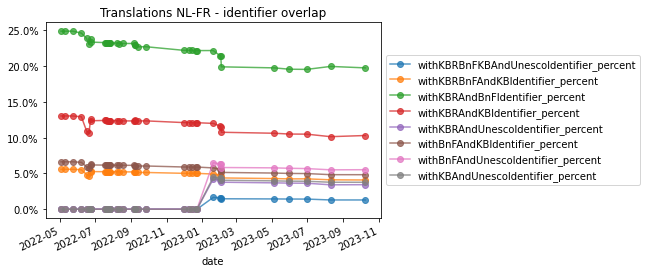

In [17]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  overlapColumns,
                                  'Translations NL-FR - identifier overlap',
                                 'numberTranslations')

In [18]:
statsNLFR[['numberTranslations'] + overlapColumns]

,numberTranslations,withKBRBnFKBAndUnescoIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,withKBRAndUnescoIdentifier,withBnFAndKBIdentifier,withBnFAndUnescoIdentifier,withKBAndUnescoIdentifier
date,,,,,,,,,
2022-05-03,3731,0,208,928,486,0,247,0,0
2022-05-09,3731,0,208,928,486,0,247,0,0
2022-05-23,3731,0,208,928,486,0,247,0,0
2022-06-07,3772,0,208,928,487,0,247,0,0
2022-06-16,3597,0,174,858,393,0,213,0,0
2022-06-20,3724,0,173,857,395,0,212,0,0
2022-06-23,3897,0,208,928,491,0,247,0,0
2022-06-24,3997,0,210,933,494,0,247,0,0
2022-07-18,4009,0,210,933,497,0,247,0,0


## ISBN identifiers
The total number of translations and how many have ISBN10/ISBN13.

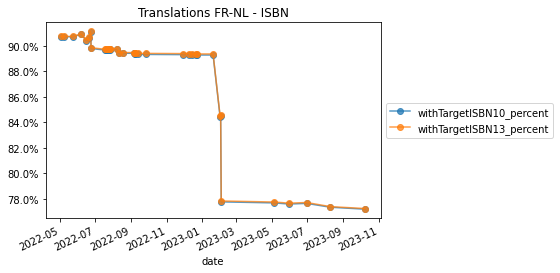

In [19]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withTargetISBN10', 'withTargetISBN13'],
                                  'Translations FR-NL - ISBN',
                                 'numberTranslations')

In [20]:
statsFRNL[['numberTranslations', 'withTargetISBN10', 'withTargetISBN13']]

,numberTranslations,withTargetISBN10,withTargetISBN13
date,,,
2022-05-03,6891,6250,6252
2022-05-09,6891,6250,6252
2022-05-23,6891,6250,6252
2022-06-07,7091,6445,6447
2022-06-16,6715,6069,6071
2022-06-20,7350,6659,6663
2022-06-23,7752,7061,7065
2022-06-24,8149,7316,7321
2022-07-18,8254,7400,7405


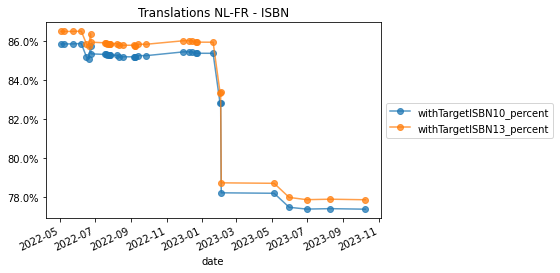

In [21]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withTargetISBN10', 'withTargetISBN13'],
                                  'Translations NL-FR - ISBN',
                                 'numberTranslations')

In [22]:
statsNLFR[['numberTranslations', 'withTargetISBN10', 'withTargetISBN13']]

,numberTranslations,withTargetISBN10,withTargetISBN13
date,,,
2022-05-03,3731,3204,3228
2022-05-09,3731,3204,3228
2022-05-23,3731,3204,3228
2022-06-07,3772,3240,3264
2022-06-16,3597,3065,3089
2022-06-20,3724,3170,3194
2022-06-23,3897,3343,3367
2022-06-24,3997,3412,3436
2022-07-18,4009,3421,3445


## Contributor information

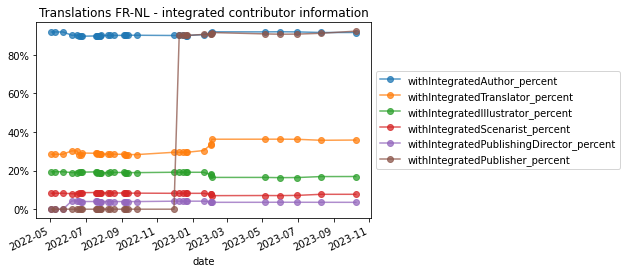

In [23]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                 ['withIntegratedAuthor', 'withIntegratedTranslator', 'withIntegratedIllustrator',
                                  'withIntegratedScenarist', 'withIntegratedPublishingDirector', 
                                  'withIntegratedPublisher'],
                                  'Translations FR-NL - integrated contributor information',
                                 'numberTranslations')

In [24]:
statsFRNL[['numberTranslations', 'withKBRIdentifier', 'withIntegratedAuthor', 'withIntegratedPublisher']]

,numberTranslations,withKBRIdentifier,withIntegratedAuthor,withIntegratedPublisher
date,,,,
2022-05-03,6891,6125,6322,0
2022-05-09,6891,6125,6322,0
2022-05-23,6891,6125,6322,0
2022-06-07,7091,6325,6385,0
2022-06-16,6715,5980,6052,0
2022-06-20,7350,6669,6594,0
2022-06-23,7752,7040,6956,0
2022-06-24,8149,7439,7296,0
2022-07-18,8254,7524,7401,0


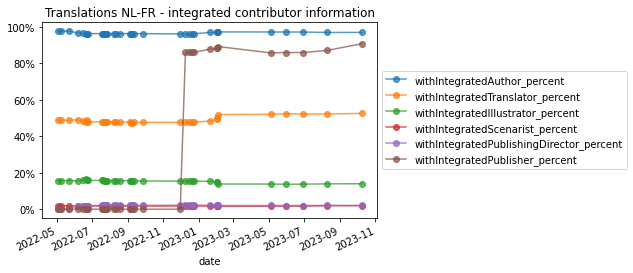

In [25]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                 ['withIntegratedAuthor', 'withIntegratedTranslator', 'withIntegratedIllustrator',
                                  'withIntegratedScenarist', 'withIntegratedPublishingDirector', 
                                  'withIntegratedPublisher'],
                                  'Translations NL-FR - integrated contributor information',
                                 'numberTranslations')

In [26]:
statsNLFR[['numberTranslations', 'withKBRIdentifier', 'withIntegratedAuthor', 'withIntegratedPublisher']]

,numberTranslations,withKBRIdentifier,withIntegratedAuthor,withIntegratedPublisher
date,,,,
2022-05-03,3731,3249,3645,0
2022-05-09,3731,3249,3645,0
2022-05-23,3731,3249,3645,0
2022-06-07,3772,3290,3647,0
2022-06-16,3597,3115,3474,0
2022-06-20,3724,3247,3583,0
2022-06-23,3897,3420,3753,0
2022-06-24,3997,3525,3852,0
2022-07-18,4009,3532,3862,0


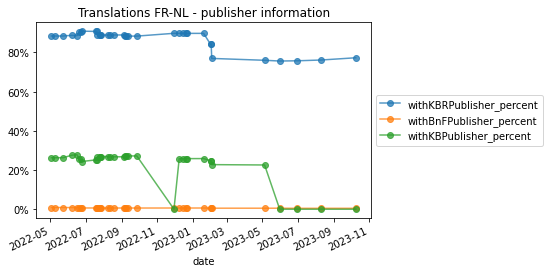

In [27]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                 ['withKBRPublisher', 'withBnFPublisher', 'withKBPublisher'],
                                 'Translations FR-NL - publisher information',
                                 'numberTranslations')

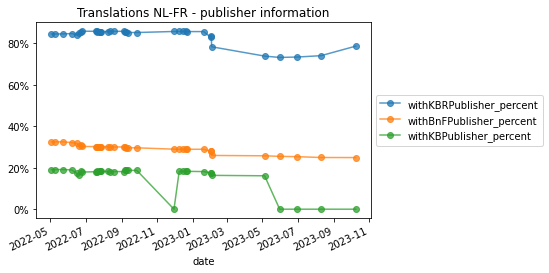

In [28]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                 ['withKBRPublisher', 'withBnFPublisher', 'withKBPublisher'],
                                 'Translations NL-FR - publisher information',
                                 'numberTranslations')

## Information about original of translation (source)
The total number of translation and for how many we have which kind of information for the original.

### source information FR-NL

* Information about source titles in general (percentage with respect to the number of translations)
* detailed information about KBR source information
* detailed information about BnF source information
* detailed information about KB source information

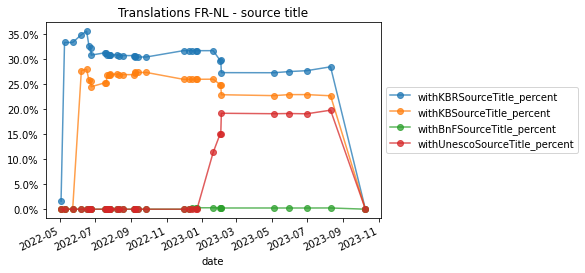

In [29]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                 ['withKBRSourceTitle', 'withKBSourceTitle', 
                                  'withBnFSourceTitle', 'withUnescoSourceTitle'],
                                 'Translations FR-NL - source title',
                                 'numberTranslations')

In [30]:
statsFRNL[['withKBRSourceTitle', 'withBnFSourceTitle', 'withKBSourceTitle', 'withUnescoSourceTitle']]

,withKBRSourceTitle,withBnFSourceTitle,withKBSourceTitle,withUnescoSourceTitle
date,,,,
2022-05-03,111,0,0,0
2022-05-09,2291,0,0,0
2022-05-23,2291,0,0,0
2022-06-07,2467,0,1961,0
2022-06-16,2384,0,1873,0
2022-06-20,2399,0,1890,0
2022-06-23,2489,0,1983,0
2022-06-24,2504,0,1990,0
2022-07-18,2575,0,2082,0


In [31]:
sourceTitleInfoColumns = ['withKBRSourceTitle', 'withKBSourceTitle', 'withUnescoSourceTitle', 
                          'withSourceKBRIdentifier', 'withSourceISBN10', 'withSourceISBN13']

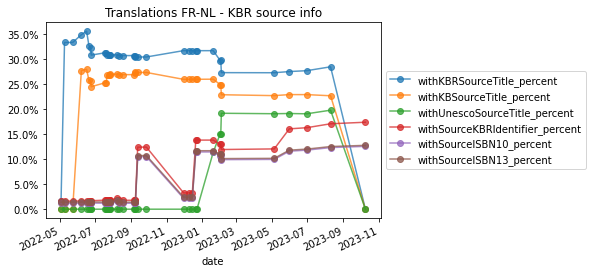

In [32]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  sourceTitleInfoColumns,
                                  'Translations FR-NL - KBR source info',
                                 'numberTranslations')

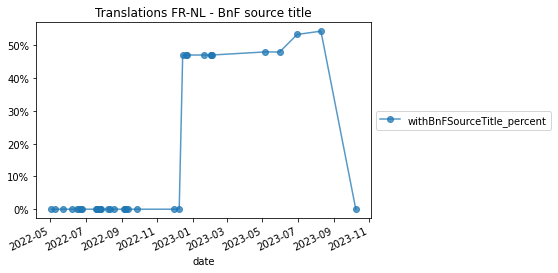

In [33]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                 ['withBnFSourceTitle'],
                                 'Translations FR-NL - BnF source title',
                                 'withBnFIdentifier')

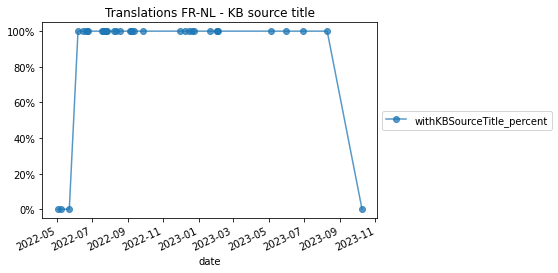

In [34]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                 ['withKBSourceTitle'],
                                 'Translations FR-NL - KB source title',
                                 'withKBIdentifier')

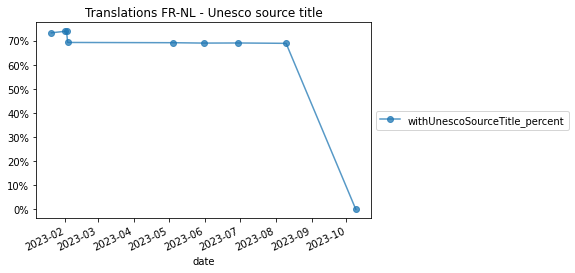

In [35]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                 ['withUnescoSourceTitle'],
                                 'Translations FR-NL - Unesco source title',
                                 'withUnescoIdentifier')

In [36]:
statsFRNL[['numberTranslations', 'withKBRIdentifier'] + sourceTitleInfoColumns]

,numberTranslations,withKBRIdentifier,withKBRSourceTitle,withKBSourceTitle,withUnescoSourceTitle,withSourceKBRIdentifier,withSourceISBN10,withSourceISBN13
date,,,,,,,,
2022-05-03,6891,6125,111,0,0,111,80,97
2022-05-09,6891,6125,2291,0,0,111,80,97
2022-05-23,6891,6125,2291,0,0,111,80,97
2022-06-07,7091,6325,2467,1961,0,116,84,101
2022-06-16,6715,5980,2384,1873,0,112,80,97
2022-06-20,7350,6669,2399,1890,0,127,93,111
2022-06-23,7752,7040,2489,1983,0,131,96,114
2022-06-24,8149,7439,2504,1990,0,137,99,117
2022-07-18,8254,7524,2575,2082,0,149,99,117


### source information NL-FR

* Information about source titles in general (percentage with respect to the number of translations)
* detailed information about KBR source information
* detailed information about BnF source information
* detailed information about KB source information

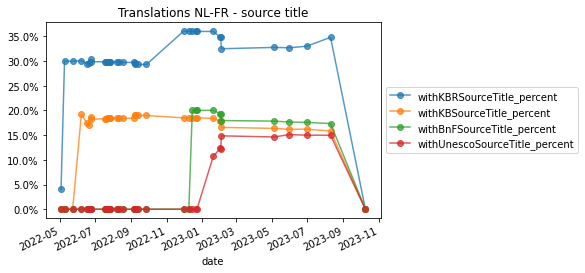

In [37]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                 ['withKBRSourceTitle', 'withKBSourceTitle', 'withBnFSourceTitle', 'withUnescoSourceTitle'],
                                 'Translations NL-FR - source title',
                                 'numberTranslations')

In [38]:
statsNLFR[['withKBRSourceTitle', 'withBnFSourceTitle', 'withKBSourceTitle', 'withUnescoSourceTitle']]

,withKBRSourceTitle,withBnFSourceTitle,withKBSourceTitle,withUnescoSourceTitle
date,,,,
2022-05-03,149,0,0,0
2022-05-09,1119,0,0,0
2022-05-23,1119,0,0,0
2022-06-07,1134,0,725,0
2022-06-16,1060,0,631,0
2022-06-20,1106,0,632,0
2022-06-23,1185,0,728,0
2022-06-24,1194,0,727,0
2022-07-18,1197,0,735,0


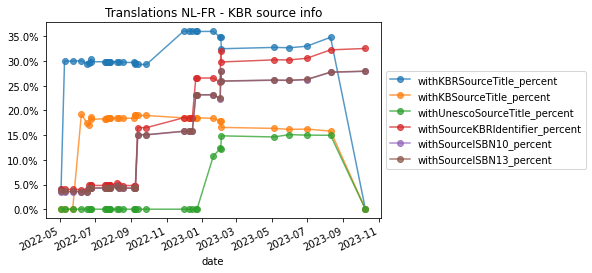

In [39]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  sourceTitleInfoColumns,
                                  'Translations NL-FR - KBR source info',
                                 'numberTranslations')

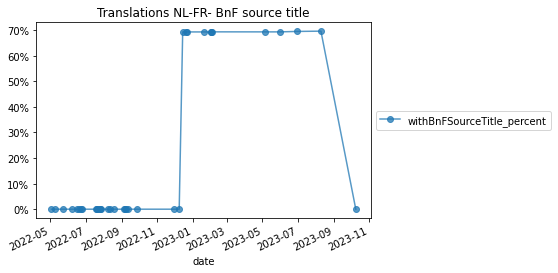

In [40]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                 ['withBnFSourceTitle'],
                                 'Translations NL-FR- BnF source title',
                                 'withBnFIdentifier')

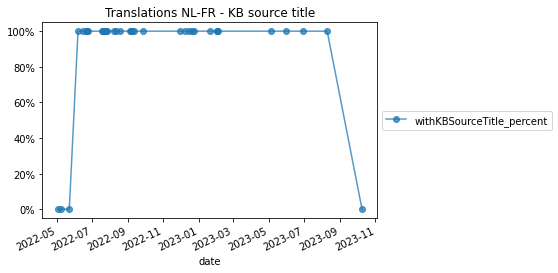

In [41]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                 ['withKBSourceTitle'],
                                 'Translations NL-FR - KB source title',
                                 'withKBIdentifier')

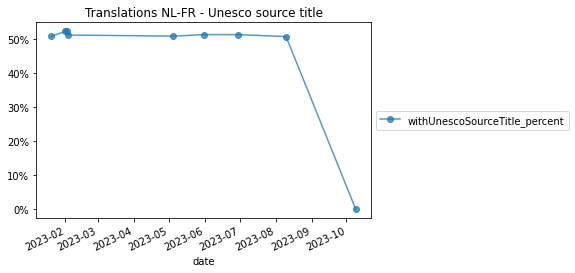

In [42]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                 ['withUnescoSourceTitle'],
                                 'Translations NL-FR - Unesco source title',
                                 'withUnescoIdentifier')

## All stats

In [43]:
statsNLFR

,measurementTime,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withUnescoIdentifier,withKBRBnFKBAndUnescoIdentifier,...,withKBRPublisher_percent,withBnFPublisher_percent,withKBPublisher_percent,withKBRSourceTitle_percent,withKBSourceTitle_percent,withBnFSourceTitle_percent,withUnescoSourceTitle_percent,withSourceKBRIdentifier_percent,withSourceISBN10_percent,withSourceISBN13_percent
date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,2023-10-09 12:06:53.330614,NL-FR,3731,3204,3228,3249,1211,724,0,0,...,84.400965,32.430984,19.083356,3.993567,0.0,0.000000,NaN,3.993567,3.564728,3.591530
2022-05-09,2023-10-09 12:06:53.972122,NL-FR,3731,3204,3228,3249,1211,724,0,0,...,84.400965,32.430984,19.083356,29.991959,0.0,0.000000,NaN,3.993567,3.564728,3.591530
2022-05-23,2023-10-09 12:06:54.495161,NL-FR,3731,3204,3228,3249,1211,724,0,0,...,84.400965,32.430984,19.083356,29.991959,0.0,0.000000,NaN,3.993567,3.564728,3.591530
2022-06-07,2023-10-09 12:06:55.037177,NL-FR,3772,3240,3264,3290,1211,725,0,0,...,84.570520,32.078473,18.902439,30.063627,100.0,0.000000,NaN,3.976670,3.552492,3.579003
2022-06-16,2023-10-09 12:06:55.522968,NL-FR,3597,3065,3089,3115,1141,631,0,0,...,83.958855,31.693078,17.208785,29.469002,100.0,0.000000,NaN,3.947734,3.530720,3.530720
2022-06-20,2023-10-09 12:06:56.058847,NL-FR,3724,3170,3194,3247,1136,632,0,0,...,84.640172,30.477981,16.648765,29.699248,100.0,0.000000,NaN,4.887218,4.323308,4.377014
2022-06-23,2023-10-09 12:06:56.953190,NL-FR,3897,3343,3367,3420,1207,728,0,0,...,85.245060,30.946882,18.373108,30.408006,100.0,0.000000,NaN,4.875545,4.336669,4.387991
2022-06-24,2023-10-09 12:06:58.203045,NL-FR,3997,3412,3436,3525,1209,727,0,0,...,85.739304,30.222667,17.888416,29.872404,100.0,0.000000,NaN,4.803603,4.253190,4.303227
2022-07-18,2023-10-09 12:06:59.274398,NL-FR,4009,3421,3445,3532,1209,735,0,0,...,85.657271,30.132203,18.034423,29.857820,100.0,0.000000,NaN,4.814168,4.265403,4.315291


In [44]:
statsFRNL

,measurementTime,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withUnescoIdentifier,withKBRBnFKBAndUnescoIdentifier,...,withKBRPublisher_percent,withBnFPublisher_percent,withKBPublisher_percent,withKBRSourceTitle_percent,withKBSourceTitle_percent,withBnFSourceTitle_percent,withUnescoSourceTitle_percent,withSourceKBRIdentifier_percent,withSourceISBN10_percent,withSourceISBN13_percent
date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,2023-10-09 12:06:52.948517,FR-NL,6891,6250,6252,6125,58,1817,0,0,...,88.347119,0.841678,26.251633,1.610797,0.0,0.000000,NaN,1.610797,1.160935,1.407633
2022-05-09,2023-10-09 12:06:53.719795,FR-NL,6891,6250,6252,6125,58,1817,0,0,...,88.347119,0.841678,26.251633,33.246263,0.0,0.000000,NaN,1.610797,1.160935,1.407633
2022-05-23,2023-10-09 12:06:54.248498,FR-NL,6891,6250,6252,6125,58,1817,0,0,...,88.347119,0.841678,26.251633,33.246263,0.0,0.000000,NaN,1.610797,1.160935,1.407633
2022-06-07,2023-10-09 12:06:54.779119,FR-NL,7091,6445,6447,6325,58,1961,0,0,...,88.675786,0.817938,27.541955,34.790580,100.0,0.000000,NaN,1.635876,1.184600,1.424341
2022-06-16,2023-10-09 12:06:55.307893,FR-NL,6715,6069,6071,5980,57,1873,0,0,...,88.518243,0.848846,27.773641,35.502606,100.0,0.000000,NaN,1.667908,1.191363,1.444527
2022-06-20,2023-10-09 12:06:55.794646,FR-NL,7350,6659,6663,6669,51,1890,0,0,...,90.258503,0.693878,25.605442,32.639456,100.0,0.000000,NaN,1.727891,1.265306,1.510204
2022-06-23,2023-10-09 12:06:56.332993,FR-NL,7752,7061,7065,7040,52,1983,0,0,...,90.363777,0.670795,25.477296,32.107843,100.0,0.000000,NaN,1.689886,1.238390,1.470588
2022-06-24,2023-10-09 12:06:57.624041,FR-NL,8149,7316,7321,7439,51,1990,0,0,...,90.820960,0.625844,24.322003,30.727697,100.0,0.000000,NaN,1.681188,1.214873,1.435759
2022-07-18,2023-10-09 12:06:58.590852,FR-NL,8254,7400,7405,7524,51,2082,0,0,...,90.695420,0.617882,25.127211,31.196995,100.0,0.000000,NaN,1.805185,1.199418,1.417495


## All statistics for the 'other' corpus
Compared to above things are only in one graph

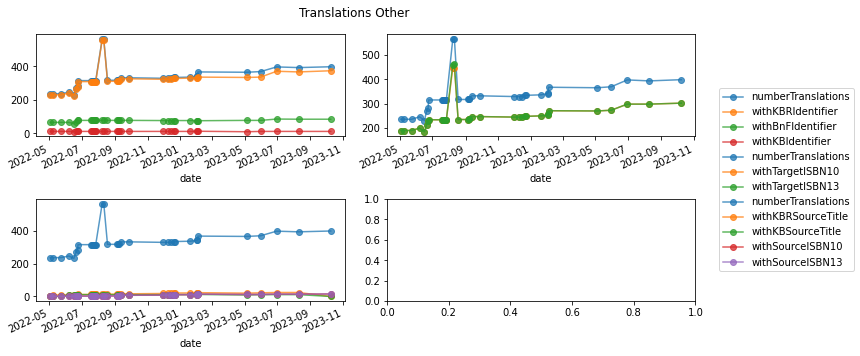

In [45]:
utils_plot.plotTranslationStats(statsOther, 'Translations Other')

In [46]:
statsOther

,measurementTime,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withUnescoIdentifier,withKBRBnFKBAndUnescoIdentifier,...,withBnFPublisher,withKBPublisher,withUnescoPublisher,withIntegratedAuthor,withIntegratedTranslator,withIntegratedIllustrator,withIntegratedScenarist,withIntegratedPublishingDirector,withIntegratedPublisher,comment
date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,2023-10-09 12:06:53.559651,OTHER,236,190,190,230,65,11,0,0,...,65,11,0,230,158,56,0,0,0,"Data integrated from KBR, BnF and KB based on ..."
2022-05-09,2023-10-09 12:06:54.117319,OTHER,236,190,190,230,65,11,0,0,...,65,11,0,230,158,56,0,0,0,"Data integrated from KBR, BnF and KB based on ..."
2022-05-23,2023-10-09 12:06:54.636273,OTHER,236,190,190,230,65,11,0,0,...,65,11,0,230,158,56,0,0,0,No changes to previous version.
2022-06-07,2023-10-09 12:06:55.183596,OTHER,246,200,200,240,65,11,0,0,...,65,11,0,232,166,56,0,19,0,Added publishing directors and included a coll...
2022-06-16,2023-10-09 12:06:55.666655,OTHER,231,185,185,225,58,10,0,0,...,58,10,0,218,157,56,0,17,0,Removed duplicate manifestations with the same...
2022-06-20,2023-10-09 12:06:56.205684,OTHER,268,214,214,262,69,11,0,0,...,69,11,0,254,179,61,0,22,0,New KBR data dump with plenty of additions and...
2022-06-23,2023-10-09 12:06:57.187490,OTHER,284,230,230,278,77,11,0,0,...,77,11,0,269,188,61,0,25,0,No ISBN duplicate removal anymore to prevent d...
2022-06-24,2023-10-09 12:06:58.386602,OTHER,315,234,234,309,77,11,0,0,...,77,11,0,297,212,70,0,27,0,"New KBR dump with old Dutch, old French and mi..."
2022-07-18,2023-10-09 12:06:59.927685,OTHER,315,234,234,309,77,11,0,0,...,77,11,0,297,212,70,0,27,0,Dataprofile query filtering also for Belgian o...
